In [7]:
import matplotlib.pyplot as plt
from aerobot.io import RESULTS_PATH, DATA_PATH
from aerobot.plot import plot_configure_mpl, plot_confusion_matrix
import pandas as pd
from matplotlib.gridspec import GridSpec
import numpy as np
import os
from typing import List, Dict, Tuple
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
%load_ext autoreload 
%autoreload 2 

plot_configure_mpl() # Make height same as width for a square confusion matrix. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
rna16s_predictions = pd.read_csv(os.path.join(RESULTS_PATH, 'predict_rna16s.csv'), index_col=0)
y_pred, y_true = rna16s_predictions.prediction.values, rna16s_predictions.label.values

rna16s_predictions.head()

,prediction,label,label_decoded
L36221,0,0,aerobe
AF247813,0,0,aerobe
M21290,2,0,aerobe
X73445,1,1,anaerobe
DQ017065,0,0,aerobe


In [9]:

# Organize the results into a dictionary. 
predict_rna16s_results = dict()
predict_rna16s_results['confusion_matrix'] = confusion_matrix(y_true, y_pred).ravel()
predict_rna16s_results['test_acc'] = balanced_accuracy_score(y_true, y_pred)
predict_rna16s_results['binary'] = False
predict_rna16s_results['classes'] = ['aerobe', 'anaerobe', 'facultative']


In [10]:
print(np.unique(y_true))

[0 1 2]


# SI Figure 5

In [11]:
def plot_si_figure_5(predict_rna16s_results:Dict, fig:plt.Figure=None, grid:GridSpec=None):

    ax = fig.add_subplot()
    plot_confusion_matrix(predict_rna16s_results, ax=ax)
    ax.set_xlabel('predicted label')
    ax.set_ylabel('true label')
    test_acc = 100 * np.round(predict_rna16s_results['test_acc'], 2)
    ax.set_title(f'16S classifier validation accuracy ({test_acc}%)')

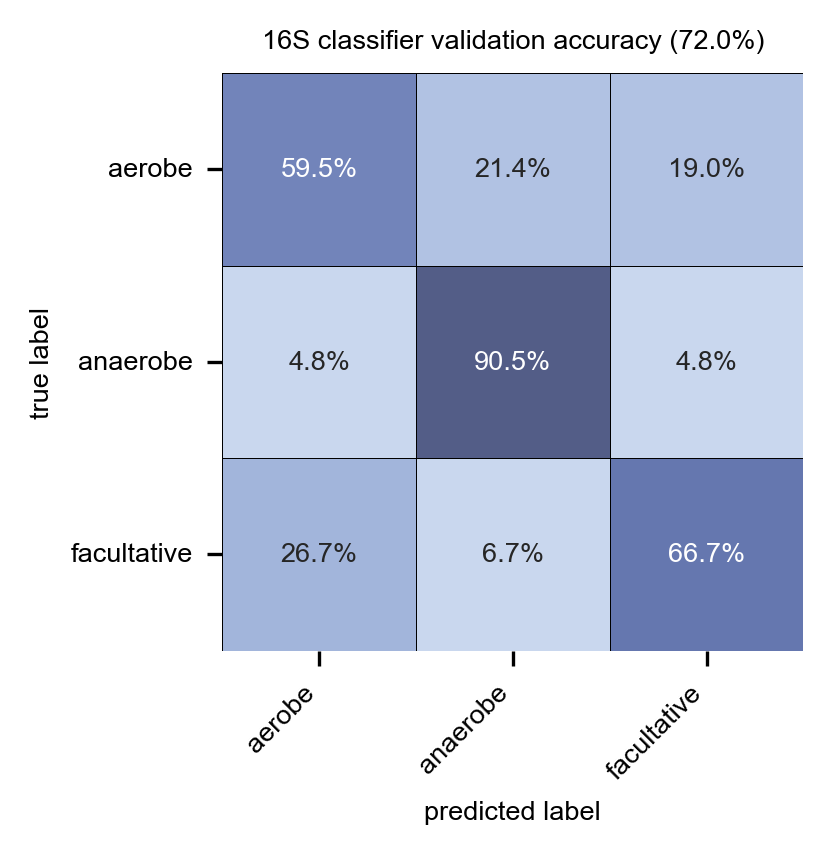

In [12]:
fig = plt.figure(figsize=(2.5, 2.5))
plot_si_figure_5(predict_rna16s_results, fig=fig)

plt.savefig('../results/figures/si_fig5.png', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()